## Challenge 2 : NLP Comments

He decidido hacer un webscraping de reddit para detectar el sentimiento de los comentarios de las personas.


In [1]:
import pandas as pd

data = pd.read_json("./comments.json")

comments = data["body"]
print(comments)

0                                  Es tejuino o tezhuino?
1       Ay si, creo si esta pésimo...en mi experiencia...
2                     a rayos tenia la etiqueta de "meme"
3       ¿Recuerdan cuando cosas así en Zapopan era alg...
4       Yo hice el EGEL pero de licenciatura y te pued...
                              ...                        
6139    No sirven estas basuras de operativos siempre ...
6140    Separados. Convéncela diciéndole que si tienes...
6141    Que tal Profet2 te agrego como moderador, por ...
6142                                   Estan bien chidas.
6143           Hola! me interesa apoyar con la moderación
Name: body, Length: 6144, dtype: object


## Preprocessing

In [2]:
comments.describe()

count                                        6144
unique                                       6044
top       Esto que tiene que ver con Guadalajara?
freq                                            8
Name: body, dtype: object

In [3]:
# import and instantiatea CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(comments)

# examine the fitted vocabulary
vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'сhapter', 'வன', '二宮沙樹'], dtype=object)

In [4]:
# transform training data into a 'document-term matrix'
dtm = vect.transform(comments)
dtm

<6144x20494 sparse matrix of type '<class 'numpy.int64'>'
	with 133757 stored elements in Compressed Sparse Row format>

In [5]:
# convert sparse matrix to a dense matrix
dtm.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names_out())

,00,000,0000,0001,000webhost,002,00pm,01,0101,02,...,única,únicamente,únicas,único,únicos,útil,μ_μ,сhapter,வன,二宮沙樹
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# examine the sparse matrix contents
print(dtm)

  (0, 7635)	1
  (0, 18492)	1
  (0, 18689)	1
  (1, 397)	1
  (1, 1327)	1
  (1, 2473)	1
  (1, 2518)	1
  (1, 2552)	1
  (1, 2718)	1
  (1, 2855)	3
  (1, 2971)	1
  (1, 3092)	1
  (1, 3122)	1
  (1, 3123)	1
  (1, 3124)	1
  (1, 3309)	1
  (1, 3383)	1
  (1, 3572)	1
  (1, 3802)	1
  (1, 3816)	1
  (1, 3846)	1
  (1, 4002)	1
  (1, 4470)	1
  (1, 4542)	1
  (1, 4709)	2
  :	:
  (6141, 12983)	1
  (6141, 13984)	1
  (6141, 14962)	1
  (6141, 15183)	1
  (6141, 15393)	1
  (6141, 15603)	1
  (6141, 15751)	2
  (6141, 16782)	1
  (6141, 17193)	1
  (6141, 17795)	1
  (6141, 18341)	1
  (6141, 18456)	2
  (6141, 19247)	1
  (6141, 19285)	1
  (6141, 19414)	1
  (6142, 2855)	1
  (6142, 3999)	1
  (6142, 7899)	1
  (6143, 1905)	1
  (6143, 4709)	1
  (6143, 9837)	1
  (6143, 10563)	1
  (6143, 11153)	1
  (6143, 12221)	1
  (6143, 12676)	1


### Data cleaning


In [8]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('spanish')
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [9]:
data["clean_body"] = data.body.apply(text_process)
data["clean_body"]

0                                        tejuino tezhuino
1       Ay si creo si pésimoen experiencia super mamon...
2                               rayos tenia etiqueta meme
3       ¿Recuerdan cosas así Zapopan comillas raro pas...
4       hice EGEL licenciatura puedo decir mientras id...
                              ...                        
6139    sirven basuras operativos siempre tarde mañana...
6140    Separados Convéncela diciéndole si problemas i...
6141    tal Profet2 agrego moderador favor unete rMxMo...
6142                                    Estan bien chidas
6143                      Hola interesa apoyar moderación
Name: clean_body, Length: 6144, dtype: object

## Lematizacion

In [10]:
import spacy

# Load the Spanish language model
nlp = spacy.load('es_core_news_sm')

def lemmatize_spanish_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Lemmatize each token and join them into a string
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Example usage
comment = data["clean_body"][1]
lemmatized_text = lemmatize_spanish_text(comment)
print("Original Text:")
print(comment)
print("\nLemmatized Text:")
print(lemmatized_text)

Original Text:
Ay si creo si pésimoen experiencia super mamones vestimenta llegaron revisar bolsas si traía celular cafetería neta bien pinche cara porqueria training broma nunca entendí vender bien toco comcast vez metieron wey cubo 3x3 dio discurso positivo mientras gritaba pareció posible lavadito cerebro bien pendejo paga tan buena bah podría escribir dos páginas basuras pos quizá buenas experiencias buen Call center parecer RIU año ahí neta chido

Lemmatized Text:
ay si creer si pésimoen experiencia super mamón vestimenta llegar revisar bolsa si traer celular cafetería neta bien pinche cara porquerio training bromo nunca entender vender bien tocar comcast vez meter wey cubo 3x3 dar discurso positivo mientras gritar parecer posible lavadito cerebro bien pendejo pagar tanto buen bah poder escribir dos página basura pos quizá buena experiencia buen Call center parecer RIU año ahí neta chido


In [11]:
data["lemm_body"] = data["clean_body"].apply(lemmatize_spanish_text)
data["lemm_body"]

0                                        tejuino tezhuino
1       ay si creer si pésimoen experiencia super mamó...
2                               rayo tenia etiqueto memir
3       ¿ recordar cosa así zapopar comilla raro pasar...
4       hacer EGEL licenciaturo poder decir mientras i...
                              ...                        
6139    servir basura operativo siempre tarde mañana n...
6140    Separados Convéncela decir él si problema ir v...
6141    tal Profet2 agrego moderador favor unetir rmxm...
6142                                     estar bien chida
6143                     Hola interesar apoyar moderación
Name: lemm_body, Length: 6144, dtype: object

## Sentimental Analysis

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the Spanish language model for NLTK
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Initialize the Spanish VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # Use the polarity_scores method to obtain the sentiment scores
    sentiment_scores = sid.polarity_scores(text)
    
    # Determine the overall sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.03:
        return 'Positivo'
    elif sentiment_scores['compound'] <= -0.03:
        return 'Negativo'
    else:
        return 'Neutral'


def analyze_sentiment_score(text):
    # Use the polarity_scores method to obtain the sentiment scores
    sentiment_scores = sid.polarity_scores(text)
    
    return sentiment_scores['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data["sentiment"] = data["lemm_body"].apply(analyze_sentiment)
data["sentiment_res"] = data["lemm_body"].apply(analyze_sentiment_score)

<Axes: >

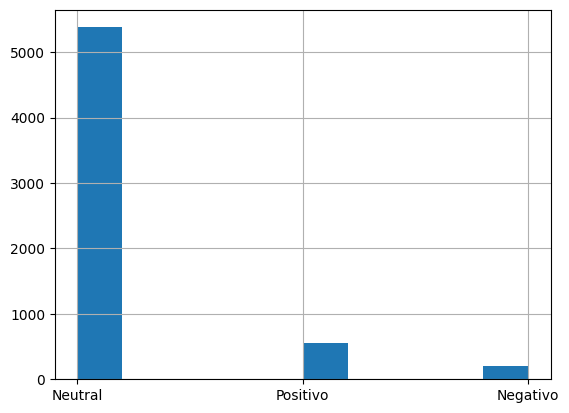

In [14]:
data["sentiment"].hist()

In [15]:
import pyLDAvis
#import pyLDAvis.gensim_models
pyLDAvis.enable_notebook() 


In [16]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import pandas as pd


In [17]:
data["lemm_body"]

# TODO https://blog.devgenius.io/working-with-pyldavis-topic-modeling-exploration-tool-b03682d57079

0                                        tejuino tezhuino
1       ay si creer si pésimoen experiencia super mamó...
2                               rayo tenia etiqueto memir
3       ¿ recordar cosa así zapopar comilla raro pasar...
4       hacer EGEL licenciaturo poder decir mientras i...
                              ...                        
6139    servir basura operativo siempre tarde mañana n...
6140    Separados Convéncela decir él si problema ir v...
6141    tal Profet2 agrego moderador favor unetir rmxm...
6142                                     estar bien chida
6143                     Hola interesar apoyar moderación
Name: lemm_body, Length: 6144, dtype: object

In [18]:
data

,post_title,body,author,clean_body,lemm_body,sentiment,sentiment_res
0,Papis y mamis tomen sus precauciones que ya es...,Es tejuino o tezhuino?,RyanDefog,tejuino tezhuino,tejuino tezhuino,Neutral,0.0000
1,Personas que trabajaron en teleperformance,"Ay si, creo si esta pésimo...en mi experiencia...",Kraujas,Ay si creo si pésimoen experiencia super mamon...,ay si creer si pésimoen experiencia super mamó...,Positivo,0.5994
2,Aventuras GDL 🇲🇽☠️💀☠️,"a rayos tenia la etiqueta de ""meme""",fer_torres1010,rayos tenia etiqueta meme,rayo tenia etiqueto memir,Neutral,0.0000
3,Balacean a 2 mujeres en Zapopan de 16 y 17 años,¿Recuerdan cuando cosas así en Zapopan era alg...,Sea_Neighborhood_397,¿Recuerdan cosas así Zapopan comillas raro pas...,¿ recordar cosa así zapopar comilla raro pasar...,Neutral,0.0000
4,Titulación,Yo hice el EGEL pero de licenciatura y te pued...,The_XProphet,hice EGEL licenciatura puedo decir mientras id...,hacer EGEL licenciaturo poder decir mientras i...,Neutral,0.0000
...,...,...,...,...,...,...,...
6139,Van los gobiernos capitalino y del Edomex cont...,No sirven estas basuras de operativos siempre ...,None,sirven basuras operativos siempre tarde mañana...,servir basura operativo siempre tarde mañana n...,Neutral,0.0000
6140,¿Sociedad conyugal o bienes separados?,Separados. Convéncela diciéndole que si tienes...,heg9998,Separados Convéncela diciéndole si problemas i...,Separados Convéncela decir él si problema ir v...,Neutral,0.0000
6141,Se abren espacios limitados para formar parte ...,"Que tal Profet2 te agrego como moderador, por ...",Nabor_C,tal Profet2 agrego moderador favor unete rMxMo...,tal Profet2 agrego moderador favor unetir rmxm...,Positivo,0.4019
6142,San Francisco Putla,Estan bien chidas.,texhat13,Estan bien chidas,estar bien chida,Neutral,0.0000


## Classification proposed

En esta seccion clasificaremos utilizando diferentes modelos


In [19]:
# Import different methods to construct a model
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import os
working_dir = os.getcwd()
from mlflow.models import infer_signature

def classification_model(model, data, X, output):
    """
    Funcion que toma un modelo de scikit learn y lo entrena y 
    valida utilizando KFold Validation.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, data[output], test_size = 0.3, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average="macro")
    recall = metrics.recall_score(y_test, y_pred, average="macro")
    f1 = metrics.f1_score(y_test, y_pred, average="macro")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    model_metrics = {
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1
    }
 
    
    kf = KFold()
    kf = kf.split(X)
    error = []
    for i, (train, test) in enumerate(kf):
        train_X = (X[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        test_X=X[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    return model, model_metrics

In [20]:
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
def log_model_into_mlflow(model_name, run_name, model, model_metrics):
    with mlflow.start_run(run_name=run_name):
        unique_name = f"{model_name}-{run_name}"
        exp = mlflow.set_experiment(experiment_name="NLPChallenge")
        mlflow.set_tag("NLPChallenge", "Basic model")
        mlflow.log_metrics(model_metrics)
        model_info = mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=unique_name,
            registered_model_name=unique_name,
        )

## MLDevOps


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

dataset = [" ".join(palabra.split()) for palabra in data['lemm_body']]
X = tfidf_vectorizer.fit_transform(dataset)
X

<6144x17196 sparse matrix of type '<class 'numpy.float64'>'
	with 81905 stored elements in Compressed Sparse Row format>

In [23]:
outcome_var= "sentiment"
run_name = "run_nlp_2"
model = DecisionTreeClassifier()
model, model_metrics = classification_model(model,data,X,outcome_var)
log_model_into_mlflow(
    model_name="DecisionTreeClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 96.963%
Cross-Validation Score : 95.932%
Cross-Validation Score : 96.094%
Cross-Validation Score : 95.959%
Cross-Validation Score : 95.952%
Cross-Validation Score : 96.078%


c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\importlib\__init__.py:126: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  return _bootstrap._gcd_import(name[level:], package, level)
Success

In [24]:
model = svm.SVC()
model, model_metrics = classification_model(model,data,X,outcome_var)
log_model_into_mlflow(
    model_name="SVC",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 90.076%
Cross-Validation Score : 88.690%
Cross-Validation Score : 88.487%
Cross-Validation Score : 88.473%
Cross-Validation Score : 89.097%
Cross-Validation Score : 89.209%


c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\importlib\__init__.py:126: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  return _bootstrap._gcd_import(name[level:], package, level)
Success

In [25]:
model = KNeighborsClassifier()
model, model_metrics = classification_model(model,data,X,outcome_var)
log_model_into_mlflow(
    model_name="KNeighborsClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 88.666%
Cross-Validation Score : 87.388%
Cross-Validation Score : 86.981%
Cross-Validation Score : 87.063%
Cross-Validation Score : 87.754%
Cross-Validation Score : 87.956%


c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\importlib\__init__.py:126: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  return _bootstrap._gcd_import(name[level:], package, level)
Success

In [26]:
model = RandomForestClassifier(n_estimators=100)
model, model_metrics = classification_model(model,data,X,outcome_var)
log_model_into_mlflow(
    model_name="RandomForestClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 94.740%
Cross-Validation Score : 93.002%
Cross-Validation Score : 92.555%
Cross-Validation Score : 92.975%
Cross-Validation Score : 93.308%
Cross-Validation Score : 93.343%


c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users\ferna\.conda\envs\ProgramacionII\Lib\importlib\__init__.py:126: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  return _bootstrap._gcd_import(name[level:], package, level)
Success

<Axes: >

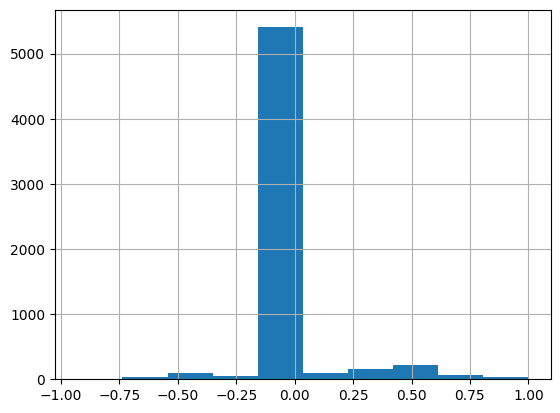

In [28]:
data["sentiment"].hist()